In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import viz
import seaborn as sns
from sklearn import datasets
from sklearn import decomposition
from sklearn.datasets import load_diabetes
import pandas as pd
colors = ['#6E8E96', '#D3787D', '#AC3931']

# generate some data

In [31]:
data_all = load_diabetes()
df = pd.DataFrame(data_all.data, columns=data_all.feature_names)
df.head()

d = df.copy() # d is same data, but with a categorical var
remap = {-0.044641636506989: 'male', 0.0506801187398187: 'female'}
d['sex'] = [remap[v] for v in df.sex]

**extended heatmap**

/accounts/projects/vision/chandan/data-viz-utils/viz.py:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(gs[topheight:, -rightwidth:])


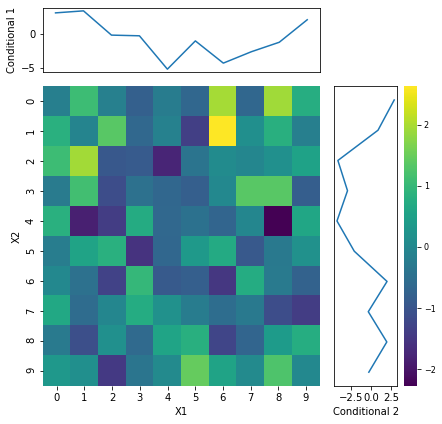

In [3]:
mat = np.random.randn(10, 10)
cond1 = mat.sum(axis=0)
cond2 = mat.sum(axis=1)
viz.heatmap_extended(mat, cond1, cond2, show_cbar=True, annot=False)
plt.savefig('plot_heatmap_extended.png', dpi=300)

**pc plot**

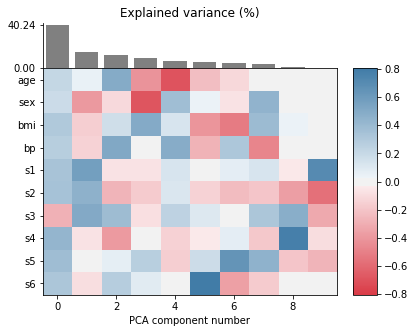

In [4]:
pca = decomposition.PCA()
pca.fit(df)
comps = pca.components_.transpose()
plt.figure(figsize=(6, 5))
viz.plot_pcs(pca, list(df.columns))
plt.savefig('plot_pcs.png', dpi=300)
plt.show()

**grouped jointplot**

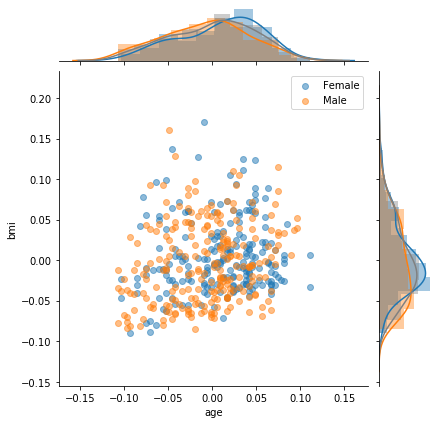

In [6]:
viz.jointplot_grouped('age', 'bmi', 'sex', d)
plt.savefig('plot_joint_grouped.png', dpi=300)

**auto-label lines**

**2-legend plot**

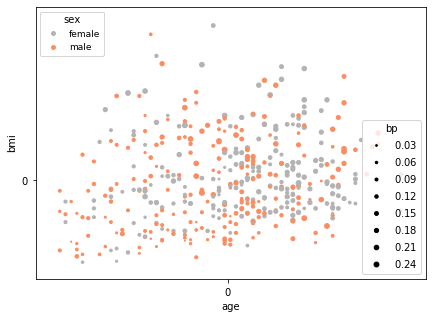

In [37]:
# cs_d = {'Male': 'red', 'Female': 'blue'}
# cs = ['#91bfdb','#dec34b','#fc8d59']
markersize_rescaling = 0.01
xlab = 'age'
ylab = 'bmi'
colorlab = 'sex'
sizelab = 'bp'
x = df[xlab]
y = d[ylab]
c = d[colorlab] #[cs_d[x] for x in d['sex']] # d['Severity 3-day'] #
s = (d[sizelab] - d[sizelab].min() + 0.01) / markersize_rescaling

viz.scatter_2_legends(x, y, c, s,
                      xlab, ylab, colorlab, sizelab,
                      markersize_rescaling, figsize=(7, 5))
plt.savefig('plot_scatter_2_legends.png', dpi=300)